# Inventory Management: Real case in managing a warehouse

## Problem Statement:

Shoes store inventory management.

Customer like a shoe but shop have no model that fits customer shoes. Shop offered another shoes but customer didn't like it.
As a shop manager, they are not happy too. They lost a customer — it’s you. And if this is the first time you visited the store, will you come back? Of course… “maybe”. But if this is the second time you got the same problem with this store, will you come back? It’s absolutely a shop manager’s nightmare.

So how can we increase the chance that customer will find their favorite shoes at our store?
what is the number of shoes (model, size) that are likely to be sold?

Sol: Analysis done on 2016 data. To increase the chances of customer getting their favorite shoes.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from pylab import rcParams
from collections import Counter

In [126]:
data = pd.read_csv('Shoe_store_raw_data.csv')

In [127]:
data.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [128]:
data.shape

(14967, 14)

In [129]:
data.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,0.124013,2015.308211,6.689517,143.987913
std,3889.598714,27.633526,1.511719,1.970014,22.940544,0.170112,0.762320,3.319909,35.180799
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,0.000000,2014.000000,1.000000,64.500000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,0.000000,2015.000000,4.000000,125.100000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,0.000000,2015.000000,7.000000,149.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,0.200000,2016.000000,10.000000,169.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,0.500000,2016.000000,12.000000,199.000000


In [130]:
data.isnull().sum()

InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
dtype: int64

In [131]:
drop_column = ['InvoiceNo','ProductID','Size (Europe)','Size (UK)','UnitPrice','Discount','Month']

Dropping unnecessary columns.

As we have Size (US), we can convert UK and Europe sizes to it.So keeping Size (US) only.

Sales Price is unit price into discount offered(Sales Price =  Unit Price * (1-Discount)). So dropping unitprice and discount.

We have date column , so we can drop Year and month column as well


In [132]:
dataset = data.drop(drop_column,axis=1)

In [133]:
dataset.head()

,Date,Country,Shop,Gender,Size (US),Year,SalePrice
0,1/1/2014,United Kingdom,UK2,Male,11.0,2014,159.0
1,1/1/2014,United States,US15,Male,11.5,2014,159.2
2,1/1/2014,Canada,CAN7,Male,9.5,2014,119.2
3,1/1/2014,United States,US6,Female,9.5,2014,159.0
4,1/1/2014,United Kingdom,UK4,Female,9.0,2014,159.0


## Percent distribution of Male and Female

In [134]:
#Women shoe sizes are different than men shoe sizes.
#So we will split dataset into two different sets with respect to Gender
print(Counter(dataset['Gender']))
pd.crosstab(dataset['Size (US)'],dataset['Gender'],)

Counter({'Male': 8919, 'Female': 6048})


Gender,Female,Male
Size (US),,
4.5,51,0
5.0,36,0
5.5,63,0
6.0,81,105
6.5,252,90
7.0,423,114
7.5,780,171
8.0,1302,354
8.5,1038,678


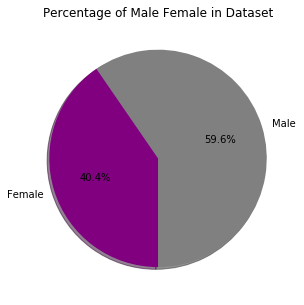

In [135]:
sizes = dataset['Gender'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,   colors=colors,
        autopct='%1.1f%%', labels= ['Male','Female'],shadow=True, startangle=270)
plt.title('Percentage of Male Female in Dataset')
plt.show()

## Splitting data as per Gender. As shoe sizes changes w.r.t. Gender.
## We are performing these analysis on male's shoes data. For female same analysis can be done.

In [136]:
male_data = dataset[dataset['Gender']=='Male'].reset_index(drop=True)
female_data = dataset[dataset['Gender']=='Female'].reset_index(drop=True)

In [137]:
male_data.shape, female_data.shape

((8919, 7), (6048, 7))

## Distrubution of shoes in countries for male.

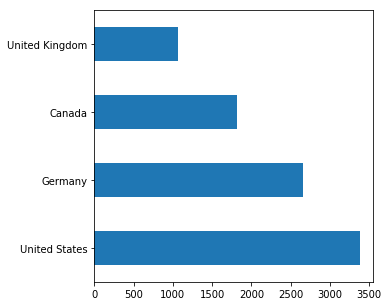

In [138]:
male_data['Country'].value_counts().plot(kind='barh')

## Distrubution of shoes in countries for Female.

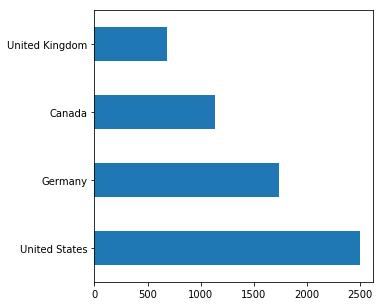

In [139]:
female_data['Country'].value_counts().plot(kind='barh')

## Problem is:

The problem: Based on our observation, what is the number of shoes (model, size) that are likely to be sold?

The condition: We will find the answer of our problem with 95% confidence interval

The plan:
- Use the last 12 months data set
(it’s enough the represent a full cycle of a year. Shopping behavior mostly bases on a full year cycle such as: year-end sale off, Black Friday, company’s promotion on its anniversary, people likely to change their shoes when winter comes (to buy warmer shoes))
- Use men shoes data set
- Use US data set
(Most number of observations)

In [140]:
from datetime import datetime

In [141]:
male_data['Month'] = pd.to_datetime(male_data['Date']).dt.month

In [142]:
male_data.head().sort_values(by='Year' ,ascending=False)

,Date,Country,Shop,Gender,Size (US),Year,SalePrice,Month
0,1/1/2014,United Kingdom,UK2,Male,11.0,2014,159.0,1
1,1/1/2014,United States,US15,Male,11.5,2014,159.2,1
2,1/1/2014,Canada,CAN7,Male,9.5,2014,119.2,1
3,1/1/2014,United States,US15,Male,10.5,2014,159.0,1
4,1/2/2014,Canada,CAN5,Male,10.0,2014,169.0,1


In [143]:
male_data.sort_values(by='Year',ascending = False).head(10).reset_index(drop=True)

,Date,Country,Shop,Gender,Size (US),Year,SalePrice,Month
0,12/31/2016,Canada,CAN6,Male,10.5,2016,125.3,12
1,5/17/2016,United States,US12,Male,10.0,2016,116.1,5
2,5/16/2016,United States,US13,Male,9.0,2016,149.0,5
3,5/16/2016,Germany,GER2,Male,9.5,2016,179.0,5
4,5/17/2016,United Kingdom,UK1,Male,8.0,2016,79.5,5
5,5/17/2016,United States,US13,Male,10.5,2016,127.2,5
6,5/17/2016,United States,US13,Male,7.0,2016,64.5,5
7,5/17/2016,Germany,GER1,Male,9.0,2016,132.3,5
8,5/17/2016,United States,US13,Male,11.0,2016,119.2,5
9,5/15/2016,United Kingdom,UK4,Male,9.5,2016,84.5,5


## Sales by Years

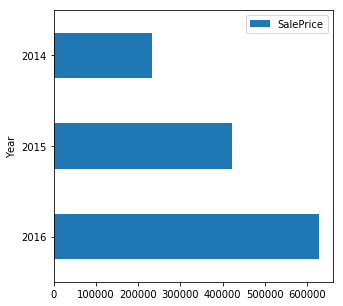

In [144]:
male_data.groupby(['Year']).sum().sort_values(by='Year',ascending=False)[['SalePrice']].plot(kind='barh')

## Sales by Years with respect to Country

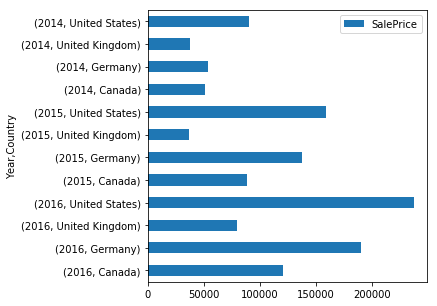

In [145]:
male_data.groupby(['Year','Country']).sum().sort_values(by='Year',ascending=False)[['SalePrice']].plot(kind='barh')

## Taking US data for analyzing sales in 2016
### It can represent a full cycle of a year.

In [146]:
US_male_data_2016 = male_data[(male_data['Year']==2016) & (male_data['Country']=='United States')]

In [147]:
US_male_data_2016.tail(5)

,Date,Country,Shop,Gender,Size (US),Year,SalePrice,Month
8908,12/30/2016,United States,US13,Male,9.5,2016,199.0,12
8909,12/30/2016,United States,US14,Male,10.0,2016,97.3,12
8913,12/31/2016,United States,US15,Male,9.5,2016,139.0,12
8915,12/31/2016,United States,US15,Male,9.0,2016,189.0,12
8916,12/31/2016,United States,US13,Male,8.0,2016,129.0,12


In [148]:
#US_male_data_2016.groupby(['Size (US)','Month'])['SalePrice'].sum().sort_values(ascending=False)
US_male_data_2016.groupby(['Size (US)','Month']).sum().sort_values(by=['Size (US)','Month'],ascending=True)[['SalePrice']]

SalePrice
Size (US) Month           
6.0       1          441.6
          2          132.3
          3          407.0
          4          134.1
          5          377.2
          6          283.5
          7          541.1
          8          540.6
          9          347.5
          10         810.3
          11         339.8
6.5       1          417.3
          2          232.2
          4          161.1
          7          139.0
          8          987.1
          9          303.3
          10         129.0
          11         308.2
          12         189.0
7.0       3          111.2
          5          680.5
          6          576.0
          7          636.0
          8          302.4
          9          406.3
7.5       1          362.3
          2          318.0
          3          379.6
          4          199.0
...                    ...
12.0      7          483.2
          8         1369.4
          9          601.5
          10        1413.6
          11         318.0
          12         127.2
13.0      1           84.5
          2          179.0
          3          194.6
          5          238.5
          6          258.4
          7          139.0
          10         561.5
          11         413.6
          12         350.1
14.0      1          287.3
          2          984.0
          3          477.0
          4          547.0
          5          809.2
          6          381.2
          7          258.0
          8          179.0
          10         199.0
          11         378.0
          12         118.3
15.0      4          189.0
          5          149.0
          7          636.0
          12         208.6

[167 rows x 1 columns]

## Sales as per shoe size.

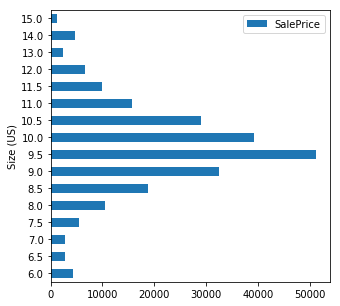

In [149]:
US_male_data_2016.groupby(['Size (US)']).sum().sort_values(by=['Size (US)'],ascending=True)[['SalePrice']].plot(kind='barh')

## Sales as per month.

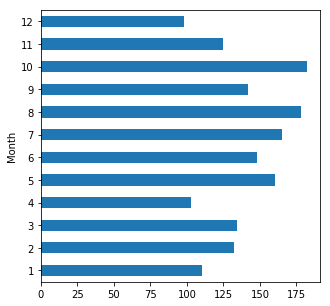

In [150]:
result.sum().plot(kind='barh')

## Month wise distribution of Shoe sizes for US in 2016

In [151]:
result = pd.crosstab(US_male_data_2016['Size (US)'],US_male_data_2016['Month'])
result

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,1,0,6,4,4,2,3,0,0,0
7.5,3,2,3,1,7,0,7,3,4,6,1,1
8.0,7,9,7,3,12,2,9,4,7,5,2,6
8.5,12,12,8,8,15,9,17,17,6,9,10,6
9.0,17,13,13,11,21,22,25,30,26,25,13,10
9.5,19,25,27,24,26,33,25,47,31,44,37,26
10.0,17,26,26,19,16,31,25,24,23,31,15,20


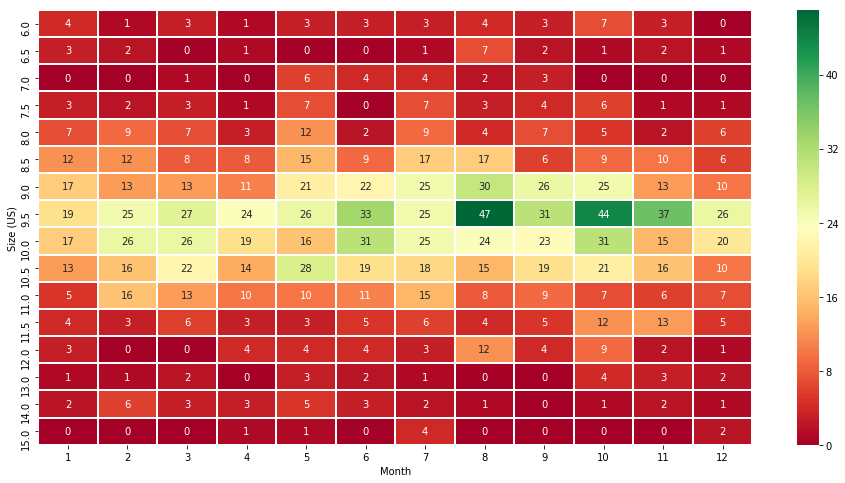

In [152]:
fig, ax = plt.subplots(figsize=(16,8)) 
ax = sns.heatmap(result,cmap='RdYlGn',linewidth=1,annot=True,ax=ax)


#### Now we can easily see the hidden message:
Too small sizes (6 to 7.5) and too big sizes (13 to 16) is not popular. So the chance that a man visits our store and buys a pair of shoes on these sizes is quite low, especially the oversize 15, and 16 — we have no unit sold for this size whole year!
Average sizes (9 to 10.5) seems very good on unit sold. US man has foot size of 9.5 seems out number of other sizes. Focus to produce and store this size, we have great chance to sell shoes and get money!

## We do not know the population variance and our sample consist of only 12 months(2016), so we use t-statistics (95 % confidence interval)

In [153]:
result1 = pd.crosstab(US_male_data_2016['Month'],US_male_data_2016['Size (US)'])
result1

Size (US),6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,13.0,14.0,15.0
Month,,,,,,,,,,,,,,,,
1,4,3,0,3,7,12,17,19,17,13,5,4,3,1,2,0
2,1,2,0,2,9,12,13,25,26,16,16,3,0,1,6,0
3,3,0,1,3,7,8,13,27,26,22,13,6,0,2,3,0
4,1,1,0,1,3,8,11,24,19,14,10,3,4,0,3,1
5,3,0,6,7,12,15,21,26,16,28,10,3,4,3,5,1
6,3,0,4,0,2,9,22,33,31,19,11,5,4,2,3,0
7,3,1,4,7,9,17,25,25,25,18,15,6,3,1,2,4
8,4,7,2,3,4,17,30,47,24,15,8,4,12,0,1,0
9,3,2,3,4,7,6,26,31,23,19,9,5,4,0,0,0


In [167]:
cal_ci['Mean'] = pd.DataFrame(result1.mean())

In [169]:
cal_ci['Standard Error']= result1.std()/math.sqrt(len(result1))

In [173]:
from scipy import stats
import math
t = stats.t.ppf(1- ((100-95)/2/100), 12-1)    #95 % confidence interval and 12 is dergree of freedom is 12-1
t

2.200985160082949

In [174]:
cal_ci['Margin Error'] = cal_ci['Standard Error'] * t

In [269]:
cal_ci = cal_ci.reset_index()


In [286]:
cal_ci

,Size (US),Mean,Standard Error,Margin Error,-ve CI,+ve CI
0,6.0,2.916667,0.514315,1.132000,2,4
1,6.5,1.666667,0.555050,1.221657,0,3
2,7.0,1.666667,0.607196,1.336429,0,3
3,7.5,3.166667,0.694495,1.528573,2,5
4,8.0,6.083333,0.882990,1.943448,4,8
5,8.5,10.750000,1.122261,2.470080,8,13
6,9.0,18.833333,1.968823,4.333349,14,23
7,9.5,30.333333,2.447427,5.386751,25,36
8,10.0,22.750000,1.567303,3.449611,19,26
9,10.5,17.583333,1.367692,3.010269,15,21


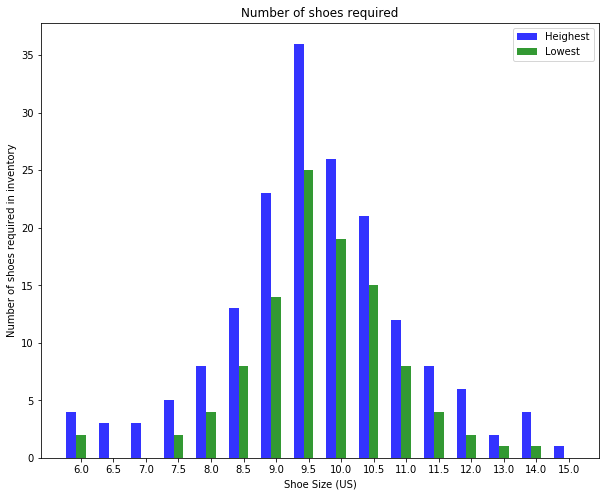

In [290]:
rcParams['figure.figsize'] = 10,8
fig, ax = plt.subplots()
index = np.arange(16)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, cal_ci['+ve CI'], bar_width,
alpha=opacity,
color='b',
label='Heighest')

rects2 = plt.bar(index + bar_width, cal_ci['-ve CI'], bar_width,
alpha=opacity,
color='g',
label='Lowest')

plt.xlabel('Shoe Size (US)')
plt.ylabel('Number of shoes required in inventory')
plt.title('Number of shoes required')
plt.xticks(index + bar_width,cal_ci['Size (US)'])
           
plt.legend()

#plt.tight_layout()
plt.show()